In [29]:
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine, inspect
from sqlalchemy.orm import Session

In [30]:
##################################Set up files location and names
path='../Resources'

broad_category_db='capgpo.csv'
locality_db='catemlde20.csv'
mortality_cause_db='catminde.csv'
main_db='defun20.csv'
mex_broad_category_db = 'gpolimex.csv'
mex_mortality_cause_db = 'lista1.csv'
category_detail_db = 'listamex.csv'
relationship_db = 'parentesco.csv'




In [31]:
os.chdir(path)

In [32]:
#############################  data handling ################################################
broad_category = pd.read_csv(broad_category_db)

broad_category.drop(broad_category.columns[[0]], axis=1, inplace=True)
broad_category.head()


,CONSE,CAP,GPO,DESCRIP
0,1,1,NaN,Ciertas enfermedades infecciosas y parasitarias
1,2,1,1.0,Enfermedades infecciosas intestinales (A00-A09)
2,3,1,2.0,Tuberculosis (A15-A19)
3,4,1,3.0,Ciertas zoonosis bacterianas (A20-A28)
4,5,1,4.0,Otras enfermedades bacterianas (A30-A49)


In [33]:
locality = pd.read_csv(locality_db)

locality.drop(locality.columns[[0]], axis=1, inplace=True)
locality.head()

,CVE_ENT,CVE_MUN,CVE_LOC,NOM_LOC
0,1,0,0,Aguascalientes
1,1,1,0,Aguascalientes
2,1,1,1,Aguascalientes
3,1,1,106,Arellano
4,1,1,120,Buenavista de Peñuelas


In [34]:
mortality_cause = pd.read_csv(mortality_cause_db)
mortality_cause.drop(mortality_cause.columns[[0]], axis=1, inplace=True)
mortality_cause.head()

,CVE,DESCRIP
0,A010,Fiebre tifoidea
1,A012,Fiebre paratifoidea B
2,A020,Enteritis debida a Salmonella
3,A021,Sepsis debida a Salmonella
4,A029,"Infección debida a Salmonella, no especificada"


In [35]:
main = pd.read_csv(main_db)

main.drop(main.columns[[0]], axis=1, inplace=True)
main.head()

,ENT_REGIS,MUN_REGIS,ENT_RESID,MUN_RESID,TLOC_RESID,LOC_RESID,ENT_OCURR,MUN_OCURR,TLOC_OCURR,LOC_OCURR,...,ANIO_CERT,MATERNAS,LENGUA,COND_ACT,PAR_AGRE,ENT_OCULES,MUN_OCULES,LOC_OCULES,RAZON_M,DIS_RE_OAX
0,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,9,88,88,888,8888,NaN,999
1,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,9,9,88,88,888,8888,NaN,999
2,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,2,88,88,888,8888,NaN,999
3,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,9,9,88,88,888,8888,NaN,999
4,1,6,1,9,4,1,1,9,4,1,...,2020,NaN,2,1,88,88,888,8888,NaN,999


In [36]:
mex_broad_category = pd.read_csv(mex_broad_category_db)

mex_broad_category.drop(mex_broad_category.columns[[0]], axis=1, inplace=True)
mex_broad_category.head()

,VALOR,DESCRIPCIO
0,01,ENFERMEDADES INFECCIOSAS INTESTINALES
1,02,TUBERCULOSIS
2,03,OTRAS ENFERMEDADES BACTERIANAS
3,04,INFECCIONES CON MODO DE TRANSMISION PREDOMINAN...
4,05,OTRAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS ...


In [37]:
mex_mortality_cause= pd.read_csv(mex_mortality_cause_db)

mex_mortality_cause.drop(mex_mortality_cause.columns[[0]], axis=1, inplace=True)
mex_mortality_cause.head()

,CVE,DESCRIP
0,1,001 Ciertas enfermedades infecciosas y paras...
1,2,002 Cólera
2,3,003 Diarrea y gastroenteritis de presunto orig...
3,4,004 Otras enfermedades infecciosas intestinales
4,5,005 Tuberculosis respiratoria


In [38]:
category_detail= pd.read_csv(category_detail_db)

category_detail.drop(category_detail.columns[[0]], axis=1, inplace=True)
category_detail.head()

,CVE,DESCRIP
0,01,Enfermedades infecciosas intestinales
1,01A,Cólera
2,01B,Fiebre tifoidea
3,01C,Fiebre paratifoidea
4,01D,Shigelosis


In [39]:
relationship= pd.read_csv(relationship_db)

relationship.drop(relationship.columns[[0]], axis=1, inplace=True)
relationship.head()

,CLAVE,DESCRIP
0,1,Padre
1,2,Madre
2,3,Hermano
3,4,Hermana
4,5,Hijo


In [40]:
chapter=broad_category.loc[pd.isnull(broad_category).any(1),:]
chapter

,CONSE,CAP,GPO,DESCRIP
0,1,1,NaN,Ciertas enfermedades infecciosas y parasitarias
22,23,2,NaN,Tumores (neoplasias)
41,42,3,NaN,Enfermedades de la sangre y de los órganos hem...
48,49,4,NaN,"Enfermedades endocrinas, nutricionales y metab..."
57,58,5,NaN,Trastornos mentales y del comportamiento
69,70,6,NaN,Enfermedades del sistema nervioso
81,82,7,NaN,Enfermedades del ojo y sus anexos
93,94,8,NaN,Enfermedades del oído y de la apófisis mastoides
98,99,9,NaN,Enfermedades del sistema circulatorio
109,110,10,NaN,Enfermedades del sistema respiratorio


In [41]:
states=locality.drop(locality[(locality["CVE_MUN"]>0) | (locality["CVE_LOC"]>0)].index)
states.head()

,CVE_ENT,CVE_MUN,CVE_LOC,NOM_LOC
0,1,0,0,Aguascalientes
189,2,0,0,Baja California
372,3,0,0,Baja California Sur
443,4,0,0,Campeche
662,5,0,0,Coahuila de Zaragoza


In [42]:
municipalities=locality.drop(locality[(locality["CVE_MUN"]>0) & (locality["CVE_LOC"]!=1)].index)
municipalities["ID"]=municipalities["CVE_ENT"].apply(str)+"_"+municipalities["CVE_MUN"].apply(str)
municipalities.head()

,CVE_ENT,CVE_MUN,CVE_LOC,NOM_LOC,ID
0,1,0,0,Aguascalientes,1_0
2,1,1,1,Aguascalientes,1_1
28,1,2,1,Asientos,1_2
58,1,3,1,Calvillo,1_3
82,1,4,1,Cosío,1_4


In [43]:
municipalities.head()

,CVE_ENT,CVE_MUN,CVE_LOC,NOM_LOC,ID
0,1,0,0,Aguascalientes,1_0
2,1,1,1,Aguascalientes,1_1
28,1,2,1,Asientos,1_2
58,1,3,1,Calvillo,1_3
82,1,4,1,Cosío,1_4


In [44]:
#Create unique dataframe
main_dataset=main

###Handle dates
main_dataset = main_dataset.drop(main_dataset[main_dataset["ANIO_OCUR"] > 2021].index)
main_dataset = main_dataset.drop(main_dataset[main_dataset["MES_OCURR"]>12].index)
main_dataset = main_dataset.drop(main_dataset[main_dataset["DIA_OCURR"]>31].index)
main_dataset = main_dataset.drop(main_dataset[main_dataset["ANIO_REGIS"]>2021].index)
main_dataset = main_dataset.drop(main_dataset[main_dataset["MES_REGIS"]>12].index)
main_dataset = main_dataset.drop(main_dataset[main_dataset["DIA_REGIS"]>31].index)
main_dataset = main_dataset.drop(main_dataset[main_dataset["ANIO_NACIM"]>2021].index)
main_dataset =main_dataset.drop(main_dataset[main_dataset["MES_NACIM"]>12].index)
main_dataset =main_dataset.drop(main_dataset[main_dataset["DIA_NACIM"]>31].index)
main_dataset["date_regis"]=pd.to_datetime(dict(year=main_dataset["ANIO_REGIS"], month=main_dataset["MES_REGIS"],day=main_dataset["DIA_REGIS"]))
main_dataset["date_ocur"]=pd.to_datetime(dict(year=main_dataset["ANIO_OCUR"],month=main_dataset["MES_OCURR"], day=main_dataset["DIA_OCURR"] ))
main_dataset["date_nacim"]=pd.to_datetime(dict(year=main_dataset["ANIO_NACIM"],month=main_dataset["MES_NACIM"], day=main_dataset["DIA_NACIM"]))



###Get name, group and chapter of the cause of death
main_dataset=pd.merge(main_dataset,mortality_cause[["CVE","DESCRIP"]],left_on="CAUSA_DEF", right_on="CVE", how="left" )
main_dataset=pd.merge(main_dataset,chapter[["CAP","DESCRIP"]],left_on="CAPITULO", right_on="CAP", how="left" )
#main_dataset=pd.merge(main_dataset,broad_category[["GPO","DESCRIP"]],left_on="GRUPO", right_on="GPO", how="left" )


###Handle locations
main_dataset["resid_location_id"]=main_dataset["ENT_RESID"].apply(str)+"_"+main_dataset["MUN_RESID"].apply(str)
main_dataset=pd.merge(main_dataset,states[["CVE_ENT","NOM_LOC"]],left_on="ENT_RESID", right_on="CVE_ENT", how="left" )
main_dataset=pd.merge(main_dataset,municipalities[["ID","NOM_LOC"]],left_on="resid_location_id", right_on="ID", how="left" )

###Handle Values
main_dataset["gender"]=np.where(main_dataset["SEXO"]==1,"Male",np.where(main_dataset["SEXO"]==2,"Female","ND"))



dict_scholarity={
1:"No education",
2:"Pre-school",
3:"Incomplete primary",
4:"Complete primary",
5:"Incomplete secondary",
6:"Complete secondary",
7:"Incomplete High school",
8:"Complete High school",
9:"Professional",
10:"Postgraduate",
88:"Under 3 years",
99:"Unknown"
}


dict_cap_disease={
"Enfermedades del sistema circulatorio":"Circulatory",
"Tumores (neoplasias)":"Tumors",
"Enfermedades del sistema digestivo":"Digestive",
"Ciertas enfermedades infecciosas y parasitarias":"Infections",
"Enfermedades del sistema respiratorio":"Respiratory",
"Trastornos mentales y del comportamiento":"Mental",
"Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad":"Blood",
"Enfermedades endocrinas, nutricionales y metabólicas":"Endocrine",
"Enfermedades del sistema nervioso":"Nervious",
"Enfermedades del ojo y sus anexos":"Eye",
"Enfermedades del oído y de la apófisis mastoides":"Ear",
"Enfermedades de la piel y del tejido subcutáneo":"Skin",
"Enfermedades del sistema osteomuscular y del tejido conjuntivo":"Muscular",
"Enfermedades del sistema genitourinario":"Reproductive",
"Embarazo, parto y puerperio":"During Pregnancy",
"Ciertas afecciones originadas en el período perinatal":"Perinatal",
"Malformaciones  congénitas, deformidades y anomalías cromosómicas":"Congenital",
"Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte":"Abnormal",
"Causas externas de morbilidad y de mortalidad":"External causes"
}


main_dataset["scholarity"]=main_dataset["ESCOLARIDA"]
main_dataset=main_dataset.replace({"scholarity":dict_scholarity})

main_dataset["death_cause_eng"]=main_dataset["DESCRIP_y"]
main_dataset=main_dataset.replace({"death_cause_eng":dict_cap_disease})


In [45]:
import datetime

main_dataset=main_dataset.rename(columns={"DESCRIP_x":"death_cause_desc","DESCRIP_y":"death_cause_cap","NOM_LOC_x":"state","NOM_LOC_y":"municipality"})


In [46]:
#import timedelta
import datetime as dt
fields_to_keep = ["date_regis","date_ocur","date_nacim","death_cause_desc","death_cause_cap","state",
                  "municipality","gender","scholarity","death_cause_eng"]
main_dataset=main_dataset[["date_regis","date_ocur","date_nacim","death_cause_desc","death_cause_cap","state",
                  "municipality","gender","scholarity","death_cause_eng"]]
main_dataset["death_age"]=(main_dataset["date_ocur"]-main_dataset["date_nacim"])/np.timedelta64(1,'Y')




In [47]:
data=pd.read_csv("main_dataset.csv")

In [48]:
data.head()

,date_regis,date_ocur,date_nacim,death_cause_desc,death_cause_cap,state,municipality,gender,scholarity,death_cause_eng,death_age
0,2020-01-16,2016-11-25,1942-03-31,Enfermedad pulmonar obstructiva crónica con ex...,Enfermedades del sistema respiratorio,Aguascalientes,Aguascalientes,Female,Incomplete primary,Respiratory,74.657248
1,2020-11-23,2016-02-07,1928-03-19,Otras obstrucciones intestinales y las no espe...,Enfermedades del sistema digestivo,Aguascalientes,Aguascalientes,Female,No education,Digestive,87.889553
2,2020-03-17,2011-05-18,1949-02-17,Enfermedad renal hipertensiva con insuficienci...,Enfermedades del sistema circulatorio,Aguascalientes,Aguascalientes,Female,Complete primary,Circulatory,62.246316
3,2020-09-03,2017-01-27,1936-03-09,Piotórax sin fístula,Enfermedades del sistema respiratorio,Aguascalientes,Aguascalientes,Male,No education,Respiratory,80.888725
4,2020-10-27,2018-02-14,1939-10-21,Aterosclerosis generalizada y la no especificada,Enfermedades del sistema circulatorio,Aguascalientes,Tepezalá,Male,Complete primary,Circulatory,78.320568


In [49]:
#engine = create_engine('sqlite:///Mortality_causes.sqlite', echo=True)
#sqlite_connection = engine.connect()

In [ ]:
graph1_df=main_dataset.groupby(["death_cause_eng"]).count().sort_values(["date_regis"],ascending=False)
graph1_df.reset_index(inplace=True)


graph2_df=main_dataset.groupby(["gender"]).count().sort_values(["date_regis"],ascending=False)
graph2_df.reset_index(inplace=True)

In [56]:
import sqlite3
database = "../mortality.sqlite"
conn = sqlite3.connect(database)

In [57]:
main_dataset.to_sql(name='mortality_causes', con=conn)
conn.close()

graph1_df.to_sql(name='graph1_df', con=conn)
conn.close()

graph2_df.to_sql(name='graph2_df', con=conn)
conn.close()




TypeError: setlocale() argument 2 must be str or None, not int

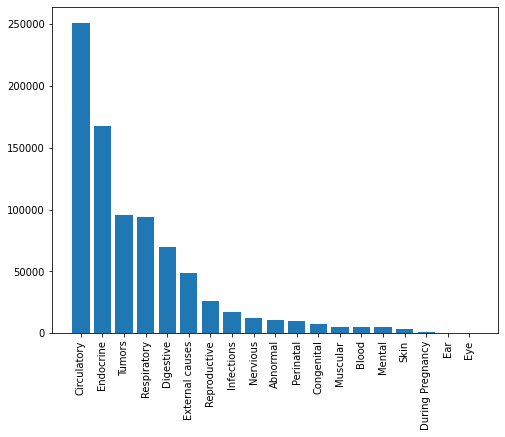

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), facecolor='white')
plt.bar(graph1_df['death_cause_eng'],graph1_df['date_regis'])
plt.xticks(rotation=90)
plt.show()

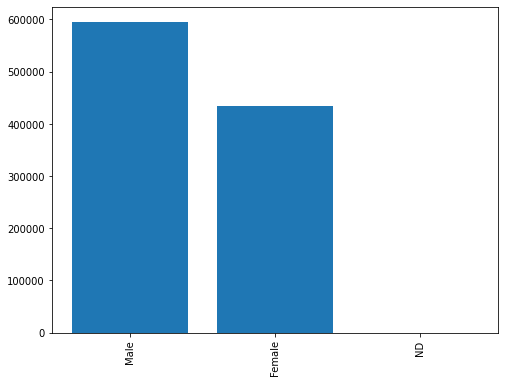

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), facecolor='white')
plt.bar(graph2_df['gender'],graph2_df['date_regis'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), facecolor='white')
plt.plot(graph2_df['gender'],graph2_df['date_regis'])
plt.xticks(rotation=90)
plt.show()

In [58]:
#!pip install plotly

     ---------------------------------------- 15.2/15.2 MB 2.2 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\vanem\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
import sqlite3
import pandas as pd
database = "../mortality.sqlite"
cnx = sqlite3.connect('mortality.sqlite')
df = pd.read_sql_query("SELECT * FROM mortality_causes", cnx)

,index,date_regis,date_ocur,date_nacim,death_cause_desc,death_cause_cap,state,municipality,gender,scholarity,death_cause_eng,death_age
0,0,2020-01-16 00:00:00,2016-11-25 00:00:00,1942-03-31 00:00:00,Enfermedad pulmonar obstructiva crónica con ex...,Enfermedades del sistema respiratorio,Aguascalientes,Aguascalientes,Female,Incomplete primary,Respiratory,74.657248
1,1,2020-11-23 00:00:00,2016-02-07 00:00:00,1928-03-19 00:00:00,Otras obstrucciones intestinales y las no espe...,Enfermedades del sistema digestivo,Aguascalientes,Aguascalientes,Female,No education,Digestive,87.889553
2,2,2020-03-17 00:00:00,2011-05-18 00:00:00,1949-02-17 00:00:00,Enfermedad renal hipertensiva con insuficienci...,Enfermedades del sistema circulatorio,Aguascalientes,Aguascalientes,Female,Complete primary,Circulatory,62.246316
3,3,2020-09-03 00:00:00,2017-01-27 00:00:00,1936-03-09 00:00:00,Piotórax sin fístula,Enfermedades del sistema respiratorio,Aguascalientes,Aguascalientes,Male,No education,Respiratory,80.888725
4,4,2020-10-27 00:00:00,2018-02-14 00:00:00,1939-10-21 00:00:00,Aterosclerosis generalizada y la no especificada,Enfermedades del sistema circulatorio,Aguascalientes,Tepezalá,Male,Complete primary,Circulatory,78.320568


In [5]:

from flask import render_template, g, url_for
import pandas as pd
import json
import plotly 
import plotly.express as px
import sqlite3
import pandas as pd

database = "C:/Users/vanem/Homeworks/Project2/Project2/mortality.sqlite"
cnx = sqlite3.connect(database)
df = pd.read_sql_query("SELECT * FROM mortality_causes", cnx)
#df = px.data.medals_wide()
df.head()

,index,date_regis,date_ocur,date_nacim,death_cause_desc,death_cause_cap,state,municipality,gender,scholarity,death_cause_eng,death_age
0,0,2020-01-16 00:00:00,2016-11-25 00:00:00,1942-03-31 00:00:00,Enfermedad pulmonar obstructiva crónica con ex...,Enfermedades del sistema respiratorio,Aguascalientes,Aguascalientes,Female,Incomplete primary,Respiratory,74.657248
1,1,2020-11-23 00:00:00,2016-02-07 00:00:00,1928-03-19 00:00:00,Otras obstrucciones intestinales y las no espe...,Enfermedades del sistema digestivo,Aguascalientes,Aguascalientes,Female,No education,Digestive,87.889553
2,2,2020-03-17 00:00:00,2011-05-18 00:00:00,1949-02-17 00:00:00,Enfermedad renal hipertensiva con insuficienci...,Enfermedades del sistema circulatorio,Aguascalientes,Aguascalientes,Female,Complete primary,Circulatory,62.246316
3,3,2020-09-03 00:00:00,2017-01-27 00:00:00,1936-03-09 00:00:00,Piotórax sin fístula,Enfermedades del sistema respiratorio,Aguascalientes,Aguascalientes,Male,No education,Respiratory,80.888725
4,4,2020-10-27 00:00:00,2018-02-14 00:00:00,1939-10-21 00:00:00,Aterosclerosis generalizada y la no especificada,Enfermedades del sistema circulatorio,Aguascalientes,Tepezalá,Male,Complete primary,Circulatory,78.320568
